In [1]:
using CairoMakie
using Oceananigans

In [2]:
grid = RectilinearGrid(size=128, z=(-0.5, 0.5), topology=(Flat, Flat, Bounded))

ScalarDiffusivity{}(ν=0.0, κ=1.0)

closure = ScalarDiffusivity(κ=1)
model = NonhydrostaticModel(; grid, closure, tracers=:T)


NonhydrostaticModel{CPU, RectilinearGrid}(time = 0 seconds, iteration = 0)
├── grid: 1×1×128 RectilinearGrid{Float64, Flat, Flat, Bounded} on CPU with 0×0×3 halo
├── timestepper: QuasiAdamsBashforth2TimeStepper
├── advection scheme: Centered reconstruction order 2
├── tracers: T
├── closure: ScalarDiffusivity{ExplicitTimeDiscretization}(ν=0.0, κ=(T=1.0,))
├── buoyancy: Nothing
└── coriolis: Nothing

In [3]:
width = 0.1
initial_temperature(z) = exp(-z^2 / (2width^2))
set!(model, T=initial_temperature)


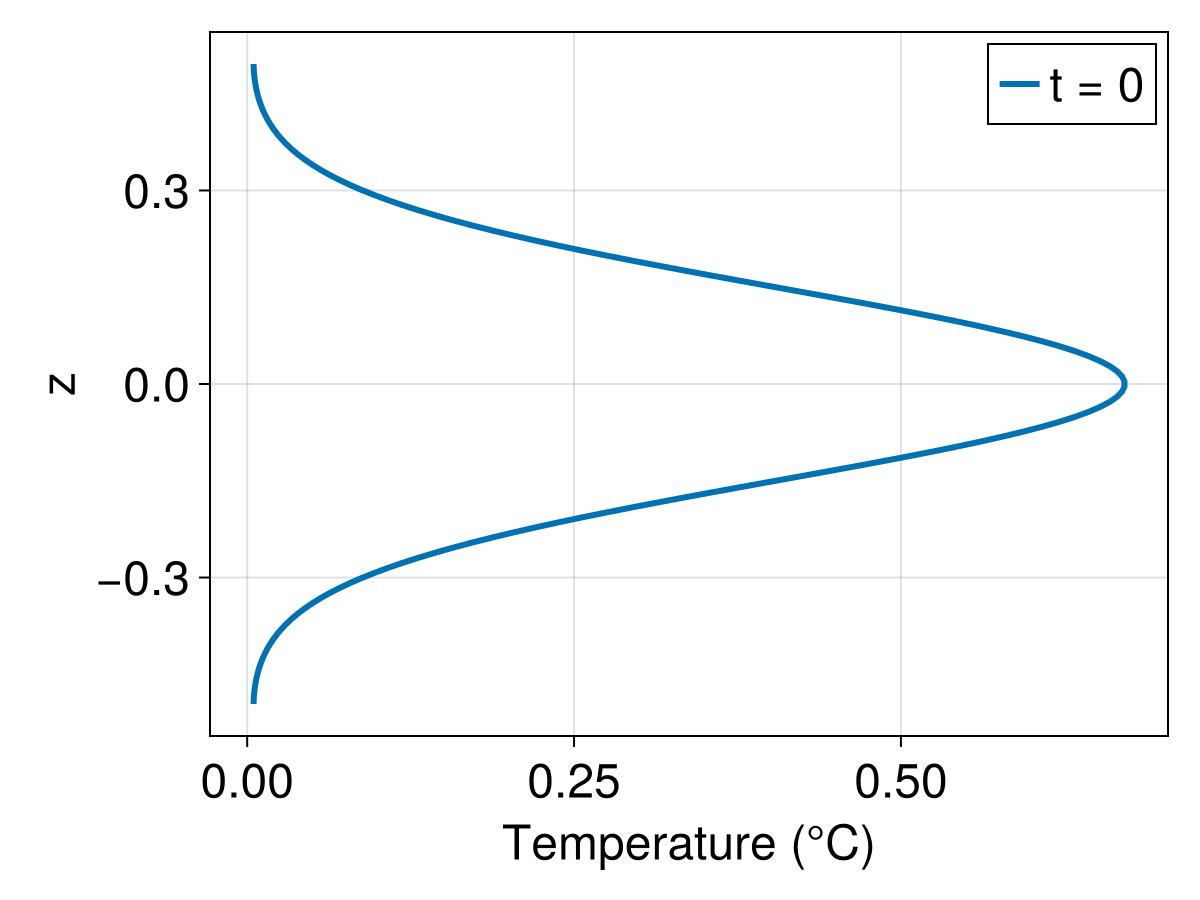

In [11]:
set_theme!(Theme(fontsize = 24, linewidth=3))

fig = Figure()
ax = Axis(fig[1, 1], xlabel = "Temperature (°C)", ylabel = "z")
label = "t = 0"

z = znodes(model.tracers.T)
T = interior(model.tracers.T, 1, 1, :)

lines!(ax, T, z, label=label)
axislegend(ax)
fig


In [15]:
min_Δz = minimum_zspacing(model.grid)
diffusion_time_scale = min_Δz^2 / model.closure.κ.T
simulation = Simulation(model, Δt = 0.1 * diffusion_time_scale, stop_iteration = 1000)
run!(simulation)


┌ Info: Initializing simulation...
└ @ Oceananigans.Simulations C:\Users\dadoi\.julia\packages\Oceananigans\OHYQj\src\Simulations\run.jl:184
┌ Info:     ... simulation initialization complete (804.100 μs)
└ @ Oceananigans.Simulations C:\Users\dadoi\.julia\packages\Oceananigans\OHYQj\src\Simulations\run.jl:220
┌ Info: Executing initial time step...
└ @ Oceananigans.Simulations C:\Users\dadoi\.julia\packages\Oceananigans\OHYQj\src\Simulations\run.jl:117
┌ Info:     ... initial time step complete (1.450 ms).
└ @ Oceananigans.Simulations C:\Users\dadoi\.julia\packages\Oceananigans\OHYQj\src\Simulations\run.jl:126
┌ Info: Simulation is stopping after running for 0 seconds.
└ @ Oceananigans.Simulations C:\Users\dadoi\.julia\packages\Oceananigans\OHYQj\src\Simulations\simulation.jl:188
┌ Info: Model iteration 1002 equals or exceeds stop iteration 1000.
└ @ Oceananigans.Simulations C:\Users\dadoi\.julia\packages\Oceananigans\OHYQj\src\Simulations\simulation.jl:189


In [21]:
using Printf
using CairoMakie

# Plotting the results after the simulation
fig2 = Figure()
ax = Axis(fig2[1, 1], xlabel = "Temperature (°C)", ylabel = "z")

# Label for the current time
label = @sprintf("t = %.3f", model.clock.time)

# Plot the updated temperature profile
T = interior(model.tracers.T, 1, 1, :)
lines!(ax, T, znodes(model.tracers.T), label=label)

axislegend(ax)
fig2

